<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [9]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE1 = 'estados-bruto.xml'

with open(NOME_ARQUIVO_FONTE1, 'r') as f:
    conteudo = f.read()

fonte = BeautifulSoup(conteudo, 'lxml-xml')

In [ ]:
# visualize os resultados

fonte

In [10]:
# manipule os dados

import csv

NOME_ARQUIVO_DESTINO1 = 'estados-limpo.csv'

# Encontre todas as tags 'ESTADO' no documento
estados = fonte.find_all('ESTADO')

# Abra o arquivo de destino para escrita
with open(NOME_ARQUIVO_DESTINO1, 'w', newline='') as f:
    writer = csv.writer(f, delimiter=';')

    # Escreva o cabeçalho do CSV
    writer.writerow(['estado', 'sigla', 'regiao'])

    # Para cada estado, extraia o nome, a sigla e a região
    for estado in estados:
        nome = estado.find('NOME').text
        sigla = estado.find('SIGLA').text
        regiao = estado.find('REGIAO').text

        # Escreva os dados no arquivo CSV
        writer.writerow([nome, sigla, regiao])


In [11]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO1 = 'estados-limpo.csv'

#Já realizado em cima

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [15]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE2 = 'cidades-bruto.csv'

# Ler o arquivo CSV
fonte2 = pd.read_csv(NOME_ARQUIVO_FONTE2)


In [ ]:
# visualize os resultados
import pandas as pd

print(fonte2.head())

In [21]:
# manipule os dados

# Selecione apenas os dados do censo de 2010
fonte2 = fonte2[fonte2['Censo'] == 2010]

# Selecione apenas as colunas necessárias
fonte2 = fonte2[['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]

# Renomeie as colunas para corresponder ao formato desejado
fonte2.columns = ['estado', 'cidade', 'pib', 'populacao', 'pib_percapita']

In [22]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO2 = 'cidades-limpo.csv'

# Salve o DataFrame em um arquivo CSV
fonte2.to_csv('cidades-limpo.csv', sep=';', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [25]:
# solução do exercício 1.3

import pandas as pd

# Ler os arquivos CSV
estados = pd.read_csv('estados-limpo.csv', sep=';')
cidades = pd.read_csv('cidades-limpo.csv', sep=';')

# Combinar os dataframes
brasil = pd.merge(cidades, estados, on='estado', how='outer')

# Salvar o dataframe combinado em um arquivo CSV
brasil.to_csv('brasil.csv', sep=';', index=False)


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [27]:
# solução do exercício 2.1

import pandas as pd

# Ler o arquivo CSV
brasil_df = pd.read_csv('brasil.csv', sep=';')

# Exibir as primeiras linhas do DataFrame
print(brasil_df.head())


  estado                 cidade           pib  populacao  pib_percapita sigla  \
0  BAHIA               Tremedal  57883.992188    18433.0    3140.239990    BA   
1  BAHIA               Maetinga  23558.447266     7884.0    2988.129883    BA   
2  BAHIA               Ibirapuã  74997.406250     7893.0    9501.759766    BA   
3  BAHIA  Governador Mangabeira  92903.820312    20668.0    4495.060059    BA   
4  BAHIA                Ibititá  62366.886719    19410.0    3213.129883    BA   

     regiao  
0  NORDESTE  
1  NORDESTE  
2  NORDESTE  
3  NORDESTE  
4  NORDESTE  


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [32]:
# código para responder a pergunta

dez_cidades_mais_populosas = brasil_df.sort_values('populacao', ascending=False).head(10)
print(dez_cidades_mais_populosas[['cidade', 'populacao']])

              cidade   populacao
3271       São Paulo  11037593.0
4504  Rio de Janeiro   6186710.0
44          Salvador   2998056.0
5554        Brasília   2606885.0
4221       Fortaleza   2505552.0
1735  Belo Horizonte   2452617.0
4849        Curitiba   1851215.0
3720          Manaus   1738641.0
2435          Recife   1561659.0
2624           Belém   1437600.0


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [33]:
# código para responder a pergunta

cinco_cidades_menor_pib_percapita = brasil_df.query("regiao == 'NORDESTE'").sort_values('pib_percapita').head(5)
print(cinco_cidades_menor_pib_percapita[['cidade', 'pib_percapita']])

            cidade  pib_percapita
362       Caetanos    2440.570068
369   Novo Triunfo    2497.060059
260         Matina    2551.989990
5152        Traipu    2649.479980
211       Mansidão    2665.449951


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [35]:
# código para responder a pergunta

quinze_cidades_maior_pib = brasil_df.query("estado == 'SÃO PAULO'").sort_values('pib', ascending=False).head(15)
print(quinze_cidades_maior_pib[['cidade', 'pib']])


                     cidade          pib
3271              São Paulo  389317152.0
3223              Guarulhos   32473828.0
3340               Campinas   31654720.0
3106                 Osasco   31616452.0
2810  São Bernardo do Campo   28935768.0
3344                Barueri   26908070.0
2768                 Santos   22546134.0
2994    São José dos Campos   22018042.0
3014                Jundiaí   16585137.0
2816            Santo André   14709603.0
2754         Ribeirão Preto   14688064.0
3152               Sorocaba   14182597.0
3038                Diadema    9969819.0
3334             Piracicaba    9601211.0
2999     São Caetano do Sul    8920202.0


 - Qual é o PIB do estado de Santa Catarina?

In [37]:
# código para responder a pergunta

pib_sc = brasil_df.query("estado == 'SANTA CATARINA'")['pib'].sum()
print(f"PIB de Santa Catarina: {pib_sc}")

PIB de Santa Catarina: 129806256.75195317


 - Qual é o população da região sul?

In [44]:
# código para responder a pergunta

populacao_sul = brasil_df.query("estado == 'SANTA CATARINA' | estado == 'PARANÁ' | estado == 'RIO GRANDE DO SUL'")['populacao'].sum()
print(f"População da região Sul: {populacao_sul}")


População da região Sul: 27719118.0


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [41]:
# código para responder a pergunta

pib_percapita_medio_ms = brasil_df.query("estado == 'MATO GROSSO DO SUL'")['pib_percapita'].mean()
print(f"PIB per capita médio de Mato Grosso do Sul: {pib_percapita_medio_ms}")

PIB per capita médio de Mato Grosso do Sul: 14458.896859975644


 - Qual é a população do Brasil?

In [42]:
# código para responder a pergunta

populacao_brasil = brasil_df['populacao'].sum()
print(f"População do Brasil: {populacao_brasil}")

População do Brasil: 191176146.0


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

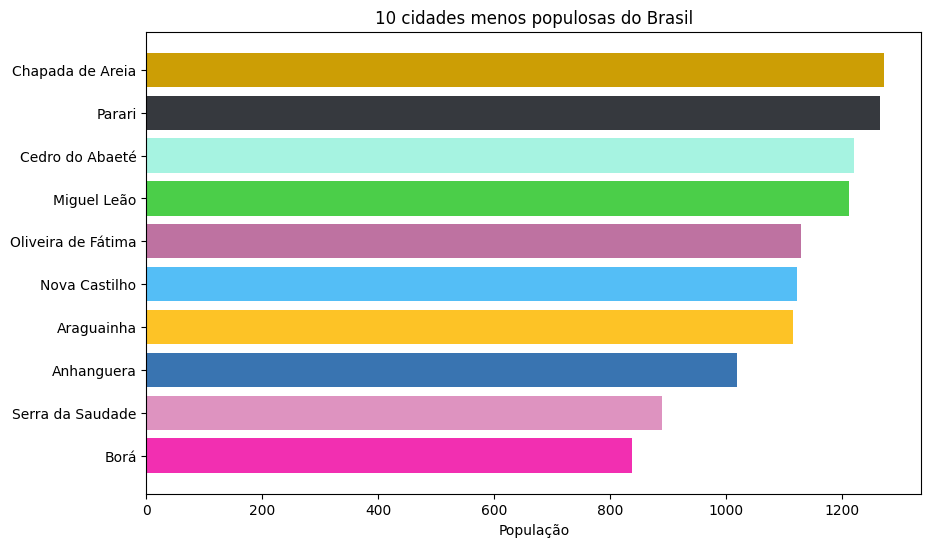

In [47]:
# código para gerar a visualização

import matplotlib.pyplot as plt
import numpy as np

dez_cidades_menos_populosas = brasil_df.sort_values('populacao').head(10)

# Gera cores aleatórias
cores = np.random.rand(10, 3)

plt.figure(figsize=(10, 6))
plt.barh(dez_cidades_menos_populosas['cidade'], dez_cidades_menos_populosas['populacao'], color=cores)
plt.xlabel('População')
plt.title('10 cidades menos populosas do Brasil')
plt.show()


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

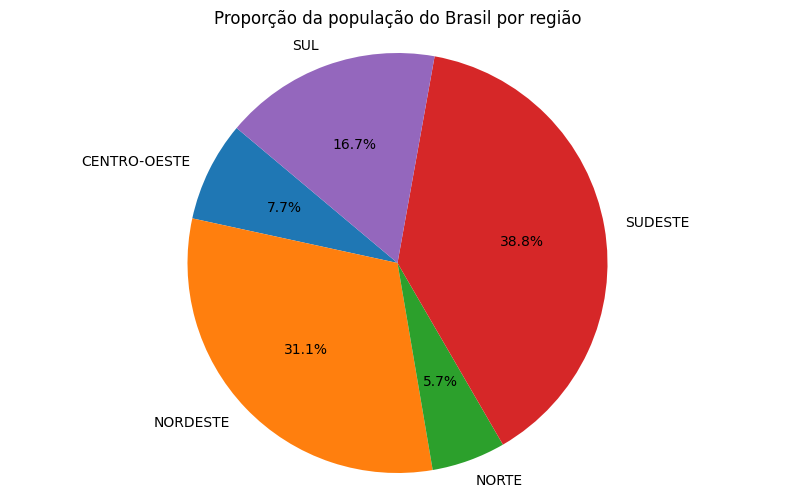

In [46]:
# código para gerar a visualização

populacao_por_regiao = brasil_df.groupby('regiao')['populacao'].sum()

plt.figure(figsize=(10, 6))
plt.pie(populacao_por_regiao, labels=populacao_por_regiao.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Para garantir que temos um gráfico de pizza circular
plt.title('Proporção da população do Brasil por região')
plt.show()